<head>
    <img src="https://www.smu.edu/~/media/Site/DevelopmentExternalAffairs/MarketingCommunications/Logos/smu/SMULogoRrgb" alt="SMU_logo" style="width:auto;height:100px;float:left; padding:5px"/>
     <img src="http://content.sportslogos.net/logos/7/1007/full/4710.gif" alt="NFL_logo" style="width:auto;height:100px;float:right; padding:5px"/>
<h1 style="text-align:center; font:40px Verdana; font-weight:bold">DS 7331 - Data Mining (Lab 1)</h1>
</head>

## The Shield
#### National Football League Play-by-Play Data (2009 - 2018)
Developed by statistical researchers from Carnegie Mellon University, <a href="https://github.com/maksimhorowitz/nflscrapR">nflscrapR</a> is designed to scrap and parse data from the NFL API. They have uploaded the NFL play-by-play data to <a href="https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016#NFL%20Play%20by%20Play%202009-2018%20(v5).csv">kaggle.com</a> as a csv file for the general public to use in order to grow the football statistics community.
<br><br>
We selected this data set since the scarcity of reliable NFL data in previous years has limited the field of sport analytics to dive deeper into the NFL. While the data set doesn't serve a singular purpose, we plan to use this data set in an effort to attempt to predict whether the play will be a first down. With the development of a Generalized Linear Model, we can produce a model to predict whether a play will result in the following:

>Touchdown
<br>
Field Goal

In [1]:
#import Pandas, Statistics, MatPlotLib, NumPy, and Seaborn
import pandas as pd
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#import data set into data frame under alias NFL
NFL = pd.read_csv("NFL.csv")

C:\Users\javie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#view macro insights & verify data imported correctly
NFL.info()
NFL.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


The data set contains 255 columns and 449,370 rows. The different data types are floats, integers, and objects. The data is a detailed play-by-play breakdown spanning from the beginning of the 2009 season and the end of Week 15 of the 2018 season. While it was imported from a .csv file, the file was sourced from the NFL API. For more information on connecting to the NFL API, please visit <a href="https://api.nfl.com/docs/getting-started/index.html">API.NFL.com</a>.

### Under the Shield
#### Taking a Closer Look at the Data Set
With 255 variables in the data set, the amount of information gathered regarding the plays is substantial. The variables includes data about the time, game, teams, score, players, and even statistical results regarding probabilities and play points. The table below lists every variable included in the data set, along with the intended data type and description of the variable.

<div style="height:200px;overflow:auto;">
<table>
  <tr>
  <th>Variables</th>    <th>Data Type</th>    <th>Description</th>
  <th></th>
  <th>Variables</th>    <th>Data Type</th>    <th>Description</th>
  </tr><tr>
    <td>play_id</td>      <td>ID</td>      <td>Assigned ID number to play in the data set</td>
    <td></td>
    <td>game_id</td>      <td>ID</td>      <td>Assigned ID number to game in the data set</td>
  </tr><tr>
    <td>home_team</td>      <td>String</td>      <td>Abbreviated name of home team</td>
    <td></td>
    <td>away_team</td>      <td>String</td>      <td>Abbreviated name of the away team</td>
  </tr><tr>
    <td>posteam</td>      <td>String</td>      <td>Abbreviated team name with possession</td>
    <td></td>
    <td>posteam_type</td>      <td>String</td>      <td>Identifies team with possession as home/away</td>
  </tr><tr>
    <td>defteam</td>      <td>String</td>      <td>Abbreviated name of team on defensee</td>
    <td></td>
    <td>side_of_field</td>      <td>String</td>      <td>Abbreviated name of team's side of the field where play begins</td>
  </tr><tr>
    <td>yardline_100</td>      <td>String</td>      <td>Yardline number where the play begins </td>
    <td></td>
    <td>game_date</td>      <td>Date</td>      <td>Date of game</td>
  </tr><tr>
    <td>quarter_seconds_remaining</td>      <td>Integer</td>      <td>Seconds remaining in the quarter</td>
    <td></td>
    <td>half_seconds_remaining</td>      <td>Integer</td>      <td>seconds remaining in the half</td>
  </tr><tr>
    <td>game_seconds_remaining</td>      <td>Integer</td>      <td>seconds remaining in the game</td>
    <td></td>
    <td>game_half</td>      <td>String</td>      <td>Indicates which half the game is currently at when the play begins</td>
  </tr><tr>
    <td>quarter_end</td>      <td>Integer</td>      <td>Indicates whether it is the last play in the quarter</td>
    <td></td>
    <td>drive</td>      <td>Integer</td>      <td>Identifies the drive number</td>
  </tr><tr>
    <td>sp</td>      <td>Integer</td>      <td>Identifies scoring plays</td>
    <td></td>
    <td>qtr</td>      <td>Integer</td>      <td>Identifies the quarter</td>
  </tr><tr>
    <td>down</td>      <td>String</td>      <td>Identifies the current down</td>
    <td></td>
    <td>goal_to_go</td>      <td>String</td>      <td>Idenfities plays in which the yards to go are to the goal line</td>
  </tr><tr>
    <td>time</td>      <td>Date</td>      <td>Running game time</td>
    <td></td>
    <td>yrdln</td>      <td>String</td>      <td>Yard line in which the play began</td>
  </tr><tr>
    <td>ydstogo</td>      <td>Integer</td>      <td>Yards left to go on downs</td>
    <td></td>
    <td>ydsnet</td>      <td>Integer</td>      <td>Net yards gained/lost in the play</td>
  </tr><tr>
    <td>desc</td>      <td>String</td>      <td>Description of the play</td>
    <td></td>
    <td>play_type</td>      <td>String</td>      <td>Type of play</td>
  </tr><tr>
    <td>yards_gained</td>      <td>Integer</td>      <td>Yards gained in the play</td>
    <td></td>
    <td>shotgun</td>      <td>Integer</td>      <td>Identifies if the play is run out of the shotgun</td>
  </tr><tr>
    <td>no_huddle</td>      <td>Integer</td>      <td>Identifies if the play started without a huddle</td>
    <td></td>
    <td>qb_dropback</td>      <td>String</td>      <td>Identifies if the QB dropped back in the play</td>
  </tr><tr>
    <td>qb_kneel</td>      <td>Integer</td>      <td>Identifies is the QB took a knee in the play</td>
    <td></td>
    <td>qb_spike</td>      <td>Integer</td>      <td>Identifies if the QB spiked the ball in the play</td>
  </tr><tr>
    <td>qb_scramble</td>      <td>Integer</td>      <td>Identifies if the QB scrambled out of the pocket</td>
    <td></td>
    <td>pass_length</td>      <td>String</td>      <td>Length of the pass in yards and yards after catch</td>
  </tr><tr>
    <td>pass_location</td>      <td>String</td>      <td>Location of where the ball was thrown to</td>
    <td></td>
    <td>air_yards</td>      <td>String</td>      <td>Yards ball travels in air during pass</td>
  </tr><tr>
    <td>yards_after_catch</td>      <td>String</td>      <td>Yards gained/lost after the pass is caught</td>
    <td></td>
    <td>run_location</td>      <td>String</td>      <td>Location of where the run headed</td>
  </tr><tr>
    <td>run_gap</td>      <td>String</td>      <td>Identifies which gap the run went through</td>
    <td></td>
    <td>field_goal_result</td>      <td>String</td>      <td>Identifies the outcome of a field goal attempt</td>
  </tr><tr>
    <td>kick_distance</td>      <td>String</td>      <td>Distance of a kick in yards</td>
    <td></td>
    <td>extra_point_result</td>      <td>String</td>      <td>Identifies the result of an extra point attempt</td>
  </tr><tr>
    <td>two_point_conv_result</td>      <td>String</td>      <td>Identifies the result of a two-point conversion attempt</td>
    <td></td>
    <td>home_timeouts_remaining</td>      <td>Integer</td>      <td>The number of timeouts the home team has remaining at the time of the play</td>
  </tr><tr>
    <td>away_timeouts_remaining</td>      <td>Integer</td>      <td>The number of timeouts the away team has remaining at the time of the play</td>
    <td></td>
    <td>timeout</td>      <td>String</td>      <td>Identifies if a timeout was called</td>
  </tr><tr>
    <td>timeout_team</td>      <td>String</td>      <td>Identifies which team called the timeout</td>
    <td></td>
    <td>td_team</td>      <td>String</td>      <td>Identifies which team performed the touchdown</td>
  </tr><tr>
    <td>posteam_timeouts_remaining</td>      <td>String</td>      <td>Number of timeouts the team with possession has remaining</td>
    <td></td>
    <td>defteam_timeouts_remaining</td>      <td>String</td>      <td>Number of timeouts the team in defense has remaining</td>
  </tr><tr>
    <td>total_home_score</td>      <td>Integer</td>      <td>Score of the home team</td>
    <td></td>
    <td>total_away_score</td>      <td>Integer</td>      <td>Score of the away team</td>
  </tr><tr>
    <td>posteam_score</td>      <td>String</td>      <td>Score of the team with possession</td>
    <td></td>
    <td>defteam_score</td>      <td>String</td>      <td>Score of the team in defense</td>
  </tr><tr>
    <td>score_differential</td>      <td>String</td>      <td>Score difference between both teams</td>
    <td></td>
    <td>posteam_score_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>defteam_score_post</td>      <td>String</td>      <td></td>
    <td></td>
    <td>score_differential_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>no_score_prob</td>      <td>Float</td>      <td>Probability of no score ocurring in the play</td>
    <td></td>
    <td>opp_fg_prob</td>      <td>Float</td>      <td>Probability of an unsuccessful field goal</td>
  </tr><tr>
    <td>opp_safety_prob</td>      <td>Float</td>      <td>Probability of a safety not occurring</td>
    <td></td>
    <td>opp_td_prob</td>      <td>Float</td>      <td>Probability of a touchdown occurring</td>
  </tr><tr>
    <td>fg_prob</td>      <td>Float</td>      <td>Probability of a successful field goal</td>
    <td></td>
    <td>safety_prob</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>td_prob</td>      <td>Float</td>      <td>Probability of a touchdown</td>
    <td></td>
    <td>extra_point_prob</td>      <td>Float</td>      <td>Probability of an extra point</td>
  </tr><tr>
    <td>two_point_conversion_prob</td>      <td>Float</td>      <td>Probability of a two-point conversion</td>
    <td></td>
    <td>ep</td>      <td>String</td>      <td>Expected Points</td>
  </tr><tr>
    <td>epa</td>      <td>String</td>      <td>Expected Points Added</td>
    <td></td>
    <td>total_home_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_rush_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_rush_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_pass_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_pass_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>air_epa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>yac_epa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>comp_air_epa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>comp_yac_epa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>total_home_comp_air_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_comp_air_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_comp_yac_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_comp_yac_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_raw_air_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_raw_air_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_home_raw_yac_epa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_away_raw_yac_epa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>wp</td>      <td>String</td>      <td>Win probability based on play</td>
  </tr><tr>
    <td>def_wp</td>      <td>String</td>      <td>Defense win probability</td>
    <td></td>
    <td>home_wp</td>      <td>String</td>      <td>Home team win probability</td>
  </tr><tr>
    <td>away_wp</td>      <td>String</td>      <td>Away team win probability</td>
    <td></td>
    <td>wpa</td>      <td>String</td>      <td>Win Probability Added</td>
  </tr><tr>
    <td>home_wp_post</td>      <td>String</td>      <td></td>
    <td></td>
    <td>away_wp_post</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>total_home_rush_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_rush_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_pass_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_pass_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>air_wpa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>yac_wpa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>comp_air_wpa</td>      <td>String</td>      <td></td>
    <td></td>
    <td>comp_yac_wpa</td>      <td>String</td>      <td></td>
  </tr><tr>
    <td>total_home_comp_air_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_comp_air_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_comp_yac_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_comp_yac_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_raw_air_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_raw_air_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>total_home_raw_yac_wpa</td>      <td>Float</td>      <td></td>
    <td></td>
    <td>total_away_raw_yac_wpa</td>      <td>Float</td>      <td></td>
  </tr><tr>
    <td>punt_blocked</td>      <td>String</td>      <td>Indicates if a punt was blocked</td>
    <td></td>
    <td>first_down_rush</td>      <td>String</td>      <td>Indicates if a rushing first down occurred</td>
  </tr><tr>
    <td>first_down_pass</td>      <td>String</td>      <td>Indicates if a passing first down occurred</td>
    <td></td>
    <td>first_down_penalty</td>      <td>String</td>      <td>Indicates if a penalty resulted in a first down</td>
  </tr><tr>
    <td>third_down_converted</td>      <td>String</td>      <td>Indicates if a third down was converted</td>
    <td></td>
    <td>third_down_failed</td>      <td>String</td>      <td>Indicates if a third down failed</td>
  </tr><tr>
    <td>fourth_down_converted</td>      <td>String</td>      <td>Indicates if a fourth down was converted</td>
    <td></td>
    <td>fourth_down_failed</td>      <td>String</td>      <td>Indicates if a fourth down was turned over on downs</td>
  </tr><tr>
    <td>incomplete_pass</td>      <td>String</td>      <td>Indicates if the pass was incomplete</td>
    <td></td>
    <td>interception</td>      <td>String</td>      <td>Indicates if an interception occurred</td>
  </tr><tr>
    <td>punt_inside_twenty</td>      <td>String</td>      <td>Indicates if punt landed between the goal line and the twnety yard line</td>
    <td></td>
    <td>punt_in_endzone</td>      <td>String</td>      <td>Indicates if the punt landed in the endzone</td>
  </tr><tr>
    <td>punt_out_of_bounds</td>      <td>String</td>      <td>Indicates if the punt landed out of bounds</td>
    <td></td>
    <td>punt_downed</td>      <td>String</td>      <td>Indicates if the punt was downed</td>
  </tr><tr>
    <td>punt_fair_catch</td>      <td>String</td>      <td>Indicates if the punt was a fair catch</td>
    <td></td>
    <td>kickoff_inside_twenty</td>      <td>String</td>      <td>Indicates if the kickoff landed between the twnety yard line and the goal line</td>
  </tr><tr>
    <td>kickoff_in_endzone</td>      <td>String</td>      <td>Indicates if the kickoff landed in the endzone</td>
    <td></td>
    <td>kickoff_out_of_bounds</td>      <td>String</td>      <td>Indicates if the kickoff landed out of bounds</td>
  </tr><tr>
    <td>kickoff_downed</td>      <td>String</td>      <td>Indicates if the kickoff was downed</td>
    <td></td>
    <td>kickoff_fair_catch</td>      <td>String</td>      <td>Indicates if the kickoff was ruled a fair catch</td>
  </tr><tr>
    <td>fumble_forced</td>      <td>String</td>      <td>Identifies if a fumble was forced</td>
    <td></td>
    <td>fumble_not_forced</td>      <td>String</td>      <td>Identifies if the fumble was not forced</td>
  </tr><tr>
    <td>fumble_out_of_bounds</td>      <td>String</td>      <td>Identifies if the fumble bounced out of bounds</td>
    <td></td>
    <td>solo_tackle</td>      <td>String</td>      <td>Indicates if a solo tackle was made</td>
  </tr><tr>
    <td>safety</td>      <td>String</td>      <td>Indicates if a safety resulted in the play</td>
    <td></td>
    <td>penalty</td>      <td>String</td>      <td>Indicates if a penalty occurred in the play</td>
  </tr><tr>
    <td>tackled_for_loss</td>      <td>String</td>      <td>Indicates if the play resulted in a tackle for loss</td>
    <td></td>
    <td>fumble_lost</td>      <td>String</td>      <td>Indicates if a fumble was lost in the play</td>
  </tr><tr>
    <td>own_kickoff_recovery</td>      <td>String</td>      <td>Identifies if the kicking team recovered their own kickoff</td>
    <td></td>
    <td>own_kickoff_recovery_td</td>      <td>String</td>      <td>Identifies if the kicking team recovered their own kick</td>
  </tr><tr>
    <td>qb_hit</td>      <td>String</td>      <td>Indicates if the quarterback was hit in the play</td>
    <td></td>
    <td>rush_attempt</td>      <td>String</td>      <td>Indicates if the play was a rush attempt</td>
  </tr><tr>
    <td>pass_attempt</td>      <td>String</td>      <td>Indicates if the play was a pass attempt</td>
    <td></td>
    <td>sack</td>      <td>String</td>      <td>Indicates if a sack occurred in the play</td>
  </tr><tr>
    <td>touchdown</td>      <td>String</td>      <td>Indicates if the play resulted in a touchdown</td>
    <td></td>
    <td>pass_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown play was a pass</td>
  </tr><tr>
    <td>rush_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown play was a rush</td>
    <td></td>
    <td>return_touchdown</td>      <td>String</td>      <td>Indicates if the touchdown was a kickoff/punt return</td>
  </tr><tr>
    <td>extra_point_attempt</td>      <td>String</td>      <td>Identifies if the play was an extra point attempt</td>
    <td></td>
    <td>two_point_attempt</td>      <td>String</td>      <td>Identifies if the play was a two-point conversion</td>
  </tr><tr>
    <td>field_goal_attempt</td>      <td>String</td>      <td>Identifies if the play was a field goal attempt</td>
    <td></td>
    <td>kickoff_attempt</td>      <td>String</td>      <td>Identifies if the play was a kickoff attempt</td>
  </tr><tr>
    <td>punt_attempt</td>      <td>String</td>      <td>Identifies if the play was a punt attempt</td>
    <td></td>
    <td>fumble</td>      <td>String</td>      <td>Identifies if the play </td>
  </tr><tr>
    <td>complete_pass</td>      <td>String</td>      <td>Identifies if the pass was completed</td>
    <td></td>
    <td>assist_tackle</td>      <td>String</td>      <td>Identifies if an assisted tackle occurred in the play</td>
  </tr><tr>
    <td>lateral_reception</td>      <td>String</td>      <td>Identifies if there was a letral reception in the play</td>
    <td></td>
    <td>lateral_rush</td>      <td>String</td>      <td>Identifies if there was a lateral in the run play</td>
  </tr><tr>
    <td>lateral_return</td>      <td>String</td>      <td>Identifies if there was a lateral in the return play</td>
    <td></td>
    <td>lateral_recovery</td>      <td>String</td>      <td>Identifies is there was a lateral in the recovery play</td>
  </tr><tr>
    <td>passer_player_id</td>      <td>String</td>      <td>ID of player who threw pass</td>
    <td></td>
    <td>passer_player_name</td>      <td>String</td>      <td>Name of player who thre pass</td>
  </tr><tr>
    <td>receiver_player_id</td>      <td>String</td>      <td>ID of player who received pass</td>
    <td></td>
    <td>receiver_player_name</td>      <td>String</td>      <td>Name of player who received pass</td>
  </tr><tr>
    <td>rusher_player_id</td>      <td>String</td>      <td>ID of player who rushed the ball</td>
    <td></td>
    <td>rusher_player_name</td>      <td>String</td>      <td>Name of player who rushed the ball</td>
  </tr><tr>
    <td>lateral_receiver_player_id</td>      <td>String</td>      <td>ID of player who received lateral pass</td>
    <td></td>
    <td>lateral_receiver_player_name</td>      <td>String</td>      <td>Name of player who received lateral pass</td>
  </tr><tr>
    <td>lateral_rusher_player_name</td>      <td>String</td>      <td>Name of player who rushed lateral pitch</td>
    <td></td>
    <td>lateral_rusher_player_id</td>      <td>String</td>      <td>ID of player who rushed lateral pitch</td>
   </tr><tr>
    <td>lateral_sack_player_id</td>      <td>String</td>      <td>ID of player who sacked lateral passer</td>
    <td></td>
    <td>lateral_sack_player_name</td>      <td>String</td>      <td>Name of player who sacked lateral passer</td>
  </tr><tr>
    <td>interception_player_id</td>      <td>String</td>      <td>ID of player who intercepted pass</td>
    <td></td>
    <td>interception_player_name</td>      <td>String</td>      <td>Name of player who intercepted pass</td>
  </tr><tr>
    <td>lateral_interception_player_id</td>      <td>String</td>      <td>ID of player who intercepted lateral</td>
    <td></td>
    <td>lateral_interception_player_name</td>      <td>String</td>      <td>Name of player who intercepted lateral</td>
  </tr><tr>
    <td>punt_returner_player_id</td>      <td>String</td>      <td>ID of player returning punt</td>
    <td></td>
    <td>punt_returner_player_name</td>      <td>String</td>      <td>Name of player returning punt</td>
  </tr><tr>
    <td>lateral_punt_returner_player_id</td>      <td>String</td>      <td>ID of player who receives lateral during punt</td>
    <td></td>
    <td>lateral_punt_returner_player_name</td>      <td>String</td>      <td>Name of player who received lateral during punt</td>
  </tr><tr>
    <td>kickoff_returner_player_name</td>      <td>String</td>      <td>Name of player who returns kick during kickoff</td>
    <td></td>
    <td>kickoff_returner_player_id</td>      <td>String</td>      <td>ID of player who returns kick during kickoff</td>
  </tr><tr>
    <td>lateral_kickoff_returner_player_id</td>      <td>String</td>      <td>ID of player who receives lateral during kickoff</td>
    <td></td>
    <td>lateral_kickoff_returner_player_name</td>      <td>String</td>      <td>Name of player who receives lateral during kickoff</td>
  </tr><tr>
    <td>punter_player_id</td>      <td>String</td>      <td>ID of punter</td>
    <td></td>
    <td>punter_player_name</td>      <td>String</td>      <td>Name of punter</td>
  </tr><tr>
    <td>kicker_player_name</td>      <td>String</td>      <td>Name of kicker</td>
    <td></td>
    <td>kicker_player_id</td>      <td>String</td>      <td>ID of kicker</td>
  </tr><tr>
    <td>own_kickoff_recovery_player_id</td>      <td>String</td>      <td>ID of player who recovers kickoff from own team</td>
    <td></td>
    <td>own_kickoff_recovery_player_name</td>      <td>String</td>      <td>Name of player who recovers kickoff from own team</td>
  </tr><tr>
    <td>blocked_player_id</td>      <td>String</td>      <td>ID of player who blocked the kick</td>
    <td></td>
    <td>blocked_player_name</td>      <td>String</td>      <td>Name of player who blocked the kick</td>
  </tr><tr>
    <td>tackle_for_loss_1_player_id</td>      <td>String</td>      <td>ID of player credited with tackle for loss 1</td>
    <td></td>
    <td>tackle_for_loss_1_player_name</td>      <td>String</td>      <td>Name of player credited with tackle for loss 1</td>
  </tr><tr>
    <td>tackle_for_loss_2_player_id</td>      <td>String</td>      <td>ID of player credited with tackle for loss 2</td>
    <td></td>
    <td>tackle_for_loss_2_player_name</td>      <td>String</td>      <td>Name of player credited with tackle for loss 2</td>
  </tr><tr>
    <td>qb_hit_1_player_id</td>      <td>String</td>      <td>ID of player credited with QB hit 1</td>
    <td></td>
    <td>qb_hit_1_player_name</td>      <td>String</td>      <td>Name of player credited with QB hit 1</td>
  </tr><tr>
    <td>qb_hit_2_player_id</td>      <td>String</td>      <td>ID of player credited with QB hit 2</td>
    <td></td>
    <td>qb_hit_2_player_name</td>      <td>String</td>      <td>Name of player credited with QB hit 2</td>
  </tr><tr>
    <td>forced_fumble_player_1_team</td>      <td>String</td>      <td>Team of player 1 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_1_player_id</td>      <td>String</td>      <td>ID of player 1 who forced fumble</td>
  </tr><tr>
    <td>forced_fumble_player_1_player_name</td>      <td>String</td>      <td>Name of player 1 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_2_team</td>      <td>String</td>      <td>Team of player 2 who forced fumble</td>
  </tr><tr>
    <td>forced_fumble_player_2_player_id</td>      <td>String</td>      <td>ID of player 2 who forced fumble</td>
    <td></td>
    <td>forced_fumble_player_2_player_name</td>      <td>String</td>      <td>Name of player 2 who forced fumble</td>
  </tr><tr>
    <td>solo_tackle_1_team</td>      <td>String</td>      <td>Team of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_team</td>      <td>String</td>      <td>Team of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>solo_tackle_1_player_id</td>      <td>String</td>      <td>ID of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_player_id</td>      <td>String</td>      <td>ID of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>solo_tackle_1_player_name</td>      <td>String</td>      <td>Name of player responsible for solo tackle 1</td>
    <td></td>
    <td>solo_tackle_2_player_name</td>      <td>String</td>      <td>Name of player responsible for solo tackle 2</td>
  </tr><tr>
    <td>assist_tackle_1_player_id</td>      <td>String</td>      <td>ID of player 1 in assist tackle</td>
    <td></td>
    <td>assist_tackle_1_player_name</td>      <td>String</td>      <td>Name of player 1 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_1_team_</td>      <td>String</td>      <td>Team of player 1 in assist tackle</td>
    <td></td>
    <td>assist_tackle_2_player_id</td>      <td>String</td>      <td>ID of player 2 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_2_player_name</td>      <td>String</td>      <td>Name of player 2 in assist tackle</td>
    <td></td>
    <td>assist_tackle_2_team</td>      <td>String</td>      <td>Team of player 2 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_3_player_id</td>      <td>String</td>      <td>ID of player 3 in assist tackle</td>
    <td></td>
    <td>assist_tackle_3_player_name</td>      <td>String</td>      <td>Name of player 3 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_3_team_</td>      <td>String</td>      <td>Team of player 3 in assist tackle</td>
    <td></td>
    <td>assist_tackle_4_player_id</td>      <td>String</td>      <td>ID of player 4 in assist tackle</td>
  </tr><tr>
    <td>assist_tackle_4_player_name</td>      <td>String</td>      <td>Name of player 4 in assist tackle</td>
    <td></td>
    <td>assist_tackle_4_team</td>      <td>String</td>      <td>Team of player 4 in assist tackle</td>
  </tr><tr>
    <td>pass_defense_1_player_id</td>      <td>String</td>      <td>ID of defensive player 1 who broke up pass</td>
    <td></td>
    <td>pass_defense_1_player_name</td>      <td>String</td>      <td>Name of defensive player 1 who broke up pass</td>
  </tr><tr>
    <td>pass_defense_2_player_id</td>      <td>String</td>      <td>ID of defensive player 2 who broke up pass</td>
    <td></td>
    <td>pass_defense_2_player_name</td>      <td>String</td>      <td>Name of defensive player 2 who broke up pass</td>
  </tr><tr>
    <td>fumbled_1_team</td>      <td>String</td>      <td>Team that fumbled 1</td>
    <td></td>
    <td>fumbled_1_player_id</td>      <td>String</td>      <td>ID of player who fumbled 1</td>
  </tr><tr>
    <td>fumbled_1_player_name</td>      <td>String</td>      <td>Name of player who fumbled 1</td>
    <td></td>
    <td>fumbled_2_team</td>      <td>String</td>      <td>Team that fumbled 2</td>
  </tr><tr>
    <td>fumbled_2_player_id</td>      <td>String</td>      <td>ID of player who fumbled 2</td>
    <td></td>
    <td>fumbled_2_player_name</td>      <td>String</td>      <td>Name of player who fumbled 2</td>
  </tr><tr>
    <td>fumble_recovery_1_team</td>      <td>String</td>      <td>Team who recovered fumble 1</td>
    <td></td>
    <td>fumble_recovery_1_yards</td>      <td>String</td>      <td>Yards gained/lost as a result of recovering fumble 1</td>
  </tr><tr>
    <td>fumble_recovery_1_player_id</td>      <td>String</td>      <td>ID of player who recovered fumble 1</td>
    <td></td>
    <td>fumble_recovery_1_player_name</td>      <td>String</td>      <td>Name of player who recovered fumble 1</td>
  </tr><tr>
    <td>fumble_recovery_2_team</td>      <td>String</td>      <td>Team who recovered fumble 2</td>
    <td></td>
    <td>fumble_recovery_2_yards</td>      <td>String</td>      <td>Yards gained/lost as a result of recovering fumble 2</td>
  </tr><tr>
    <td>fumble_recovery_2_player_id</td>      <td>String</td>      <td>ID of player who recovered fumble 2</td>
    <td></td>
    <td>fumble_recovery_2_player_name</td>      <td>String</td>      <td>Name of player who recovered fumble2</td>
  </tr><tr>
    <td>return_team</td>      <td>String</td>      <td>Team returning the ball after a kickoff/punt</td>
    <td></td>
    <td>return_yards</td>      <td>Integer</td>      <td>Amount of yards gained in a kickoff/punt return</td>
  </tr><tr>
    <td>penalty_team</td>      <td>String</td>      <td>Team that committed the penalty</td>
    <td></td>
    <td>penalty_player_id</td>      <td>String</td>      <td>ID of player who committed the penalty</td>
  </tr><tr>
    <td>penalty_player_name</td>      <td>String</td>      <td>Name of player who committed the penalty</td>
    <td></td>
    <td>penalty_yards</td>      <td>String</td>      <td>Yards penalized as a result of a penalty</td>
  </tr><tr>
    <td>replay_or_challenge</td>      <td>Integer</td>      <td>Identifies if a replay or coach's challenge occurred in the play</td>
    <td></td>
    <td>replay_or_challenge_result</td>      <td>String</td>      <td>Identifies the result of the replay or coach's challenge</td>
  </tr><tr>
    <td>penalty_type</td>      <td>String</td>      <td>Identifies the type of penalty charged in the play</td>
    <td></td>
    <td>defensive_two_point_attempt</td>      <td>String</td>      <td>Indicates if the play was a defensive two-point conversion</td>
  </tr><tr>
    <td>defensive_two_point_conv</td>      <td>String</td>      <td>Indicates if the defense two-point conversion was successful</td>
    <td></td>
    <td>defensive_extra_point_attempt</td>      <td>String</td>      <td>Indicates if the play was a defensive extra point attempt</td>
  </tr><tr>
    <td>defensive_extra_point_conv</td>      <td>String</td>      <td>Indicates if the defense extra point was successful</td>
</tr>
</table>
</div>

However, when compared with the imported data frame the variables appear to have different data types. The strings from the table are brought in as objects and so on. The variable "yardline_100" was described by the authors as a string but it appears the data frame categorized it as a float64. Considering yardlines are only whole numbers, to leave the value as a float won't affect the analysis in any adverse way. Objects would still be recognized respectively since they were designed as classes in the data set nonetheless.

In [3]:
print(NFL.dtypes)

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
posteam_type                      object
defteam                           object
side_of_field                     object
yardline_100                     float64
game_date                         object
quarter_seconds_remaining        float64
half_seconds_remaining           float64
game_seconds_remaining           float64
game_half                         object
quarter_end                        int64
drive                              int64
sp                                 int64
qtr                                int64
down                             float64
goal_to_go                       float64
time                              object
yrdln                             object
ydstogo                            int64
ydsnet                             int64
desc            

Yet, there is still a warning sign that manifested when the data was being read into the data frame. It appeared some columns may not have been read in properly since the values in the columns were mixed. However, upon further inspection, it seems the data frame read them all as objects, which is proper for all of the columns. As a result, no further action is needed with respect to the data types of the variables.

In [4]:
num = [42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249]
ColNames = NFL.columns[num]
NFL[ColNames].describe()

,two_point_conv_result,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_interception_player_id,lateral_interception_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,lateral_kickoff_returner_player_id,...,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,fumble_recovery_2_team,fumble_recovery_2_player_id,fumble_recovery_2_player_name,replay_or_challenge_result
count,696,94,94,17,17,23,23,23,23,38,...,3,3,3,38,38,38,47,47,46,812
unique,2,81,82,16,16,19,19,23,23,35,...,3,3,3,37,37,22,26,47,46,2
top,failure,00-0027891,G.Tate,00-0024242,D.Williams,00-0024360,D.Landry,00-0020495,C.Latimer,00-0026716,...,00-0024073,R.Ayodele,NO,00-0027768,M.Newhouse,TB,PHI,00-0025761,R.Golden,upheld
freq,361,5,5,2,2,3,3,1,1,2,...,1,1,1,2,2,6,5,1,1,452


### Cleaning the Shield
#### Ensuring the Quality of the Data
Consdering the data is play-specific, we anticipated plenty of nulls and/or NaNs. Many variables (such as 'yac' or 'run_gap) are play specific. In other words, if the play was a pass then there wouldn't be a 'run_gap' value. When throw away plays and special teams are taken into account (many occur in a single game), then that would create plenty of nulls and/or NaNs. As a result, we left the NaNs and nulls in the data set.
<br><br>
However, another dilema presented itself with the inclusion of statistical values such as 'epa' and 'wpa' in the data set. These values are not a direct result of a player action or play outcome, which makes them foreign variables. Considering these variables are output of an NFL statistical model (which we don't have access to validate), we removed them from the data set. Since the variables were not directly result from the play, the removal of them from the data set did not compromise the integrity of the data.

In [5]:
#Remove variables not output by player performance in the field
NFL = NFL.drop(["td_prob", "no_score_prob","opp_fg_prob", "opp_safety_prob", "opp_td_prob", "fg_prob", "safety_prob", 
                "two_point_conversion_prob", "ep", "epa", "total_home_epa", "total_away_epa", "total_home_rush_epa", "total_away_rush_epa",
                "total_home_pass_epa", "total_away_pass_epa", "air_epa", "yac_epa", "comp_air_epa", "comp_yac_epa",
                "total_home_comp_air_epa", "total_away_comp_air_epa", "total_home_comp_yac_epa", "total_away_comp_yac_epa",
                "total_home_raw_air_epa", "total_away_raw_air_epa", "total_home_raw_yac_epa", "total_away_raw_yac_epa",
                "wp", "def_wp", "home_wp", "away_wp", "wpa", "home_wp_post", "away_wp_post", "total_home_rush_wpa",
                "total_away_rush_wpa", "total_home_pass_wpa", "total_away_pass_wpa", "air_wpa", "yac_wpa", "comp_air_wpa",
                "comp_yac_wpa", "total_home_comp_air_wpa", "total_away_comp_air_wpa", "total_home_comp_yac_wpa",
                "total_away_comp_yac_wpa", "total_home_raw_air_wpa", "total_away_raw_air_wpa", "total_home_raw_yac_wpa",
                "total_away_raw_yac_wpa"], axis=1)

in 2016, the St. Louis Rams and the San Diego Chargers filed for relocation to move their teams to Los Angeles. As a result, the data set was adjusted to reflect the LA move through the entire data set. In addition, the name abbreviation for the Jacksonville Jaguars was also corrected to 'JAX.'

In [6]:
NFL = NFL.replace(to_replace='SD',value='LAC') #Code to change teamnames that have changed over the years for consistency
NFL.loc[NFL.posteam == 'LA', 'defteam'] = 'LAR'
NFL.loc[NFL.defteam == 'LA', 'defteam'] = 'LAR'
NFL.loc[NFL.home_team == 'LA', 'home_team'] = 'LAR'
NFL.loc[NFL.away_team == 'LA', 'away_team'] = 'LAR'


# STL --> LAR
NFL.loc[NFL.posteam == 'STL', 'posteam'] = 'LAR'
NFL.loc[NFL.defteam == 'STL', 'defteam'] = 'LAR'
NFL.loc[NFL.home_team == 'STL', 'home_team'] = 'LAR'
NFL.loc[NFL.away_team== 'STL', 'away_team'] = 'LAR'


# SD --> LAC
NFL.loc[NFL.posteam == 'SD', 'posteam'] = 'LAC'
NFL.loc[NFL.defteam == 'SD', 'defteam'] = 'LAC'
NFL.loc[NFL.home_team == 'SD', 'home_team'] = 'LAC'
NFL.loc[NFL.away_team == 'SD', 'away_team'] = 'LAC'


# JAC --> JAX
NFL.loc[NFL.posteam == 'JAC', 'posteam'] = 'JAX'
NFL.loc[NFL.defteam == 'JAC', 'defteam'] = 'JAX'
NFL.loc[NFL.home_team == 'JAC', 'home_team'] = 'JAX'
NFL.loc[NFL.away_team == 'JAC', 'away_team'] = 'JAX'

With the probability, expected points, and winning percentage variables removed as well as the names replaced, we can now take a deeper dive into the data. For starters, we are now left with 204 variables, all of which are related to potential outcomes in a given play.


### Simply the Shield

#### Descriptive Statistics
When we take a closer look into the plays and where they originate, we can see large frequencies in specific yard lines.

In [7]:
NFL.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


## Visualize the Shield
### The Yards
In football, the position of the ball in the field prior to the snap is one of the most critical components when deciding on a strategy. When we take a closer look into the plays and where they originate, we can see large frequencies in specific yard lines.

Text(0.5, 0, 'Yard Line')

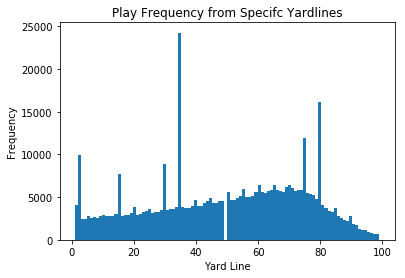

In [8]:
NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Play Frequency from Specifc Yardlines')
plt.xlabel('Yard Line')


Considering this visual includes every single play type, it would make sense to have very high frequencies in the given areas. Certain plays such as kickoffs and extra points have predetermined starting points (unless penalties are being applied). Furthermore, considering the NFL has changed the starting point for kickoffs in recent years, it would make sense for the spike to be in multiple places. 

So in order to address this, we can remove special team plays and only include run and pass play_type.

Text(0.5, 0, 'Yard Line')

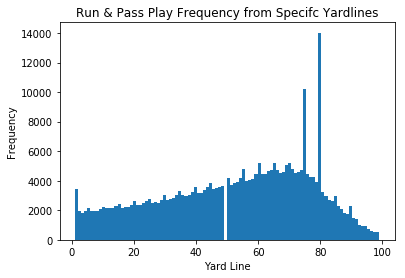

In [9]:
#Create new dataframe using only 'run' and 'pass' play_type
NFL['two_point_attempt'] = NFL['two_point_attempt'].astype(str)
Run_Pass_NFL = NFL[(NFL.play_type == 'run') | (NFL.play_type == 'pass')]

#While we may have gotten rid of the special team plays and throw away plays (QB knee, QB spike, etc.),
#we still need to keep in mind that two-point conversions start at the 2-yard line and would qualify as a 'run' or 'pass'
#play. As a result, let's go ahead and remove any two-point conversions as well in order to only get 'run' or 'pass'
#plays that are part of the drive to the endzone.
Run_Pass_NFL = Run_Pass_NFL[Run_Pass_NFL.two_point_attempt == '0.0']

#Plot new dataframe
Run_Pass_NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Run & Pass Play Frequency from Specifc Yardlines')
plt.xlabel('Yard Line')

We see the data has been cleaned up a bit more but there is still considerable spikes in specific yardlines. This is to be expected since these yard lines are the areas where the ball is normally place in the event of a fair catch during kickoff or the ball being kicked out of bounds during kickoff.

We see a spike towards the 0 yard line as well, which would also correspond with penalties committed in the endzone. Considering penalties are now granted as half-distance-to-the-goal and/or new set of downs, it is common to see a spike in plays near the goal line.

While the plays and their corresponding yard line is interesting, it doesn't help us much in respect of touchdowns! Let's remove the standard plays and see where the 'money' plays are coming from.

Text(0.5, 0, 'Yard Line')

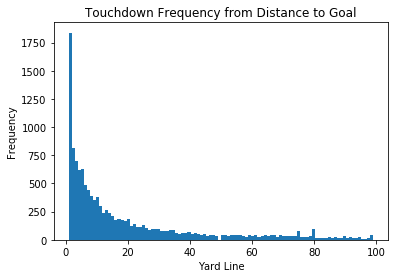

In [10]:
#Create new dataframe using only 'run' and 'pass' play_type
TD_NFL = Run_Pass_NFL[(Run_Pass_NFL.sp == 1)]

#Plot new dataframe
TD_NFL['yardline_100'].plot(kind='hist', bins=100)
plt.title('Touchdown Frequency from Distance to Goal')
plt.xlabel('Yard Line')

Based on the histogram above, we can see the relationship betwen the yard line and touchdowns that the relationship is exponential! The small spike near the 80 and 75 yard line is attributed to the beginning position of a drive after kickoff. 
<br><br>
However, when we split the touchdown plays by play_type, we can see a passing play has a much larger strike zone whereas a run play has a strike zone confined from what appears to be the final 10 yards of the field. It would make sense to run the ball more at this part of the field since a backed defense also means crowded air space when attempting to pass the ball. This creates greater opportunities for interceptions, which is too great a risk.

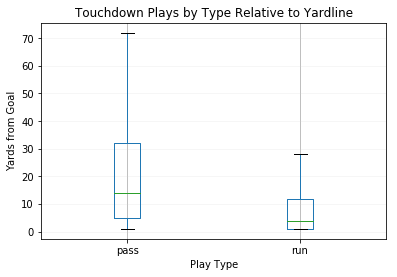

In [11]:
#Create box plot using 'yardline_100' as the y-axis and 'play_type' as class
#Outliers were not displayed in order to clearly illustrate the box plot
tdbp = TD_NFL.boxplot(column='yardline_100', by = 'play_type', showfliers=False)
#set title
tdbp.set_title('Touchdown Plays by Type Relative to Yardline')
#remove automatic title generates by pandas
plt.suptitle("")
#set y axis label
tdbp.set_ylabel('Yards from Goal')
#make grid lines light grey
tdbp.yaxis.grid(True, color='lightgrey', alpha=0.25)
#set x axis
tdbp.set_xlabel('Play Type')
#show plot
plt.show()


#### Field Goals
While special teams are not as recognized for their significance as the glorified offense, they play a critical role in the strategy of football. Field Goals often become the second resort when the offense is unable to score a touchdown or convert a third down.

In [12]:
FieldGoalsAttempted = (NFL['field_goal_result']=='missed').sum() + (NFL['field_goal_result']=='made').sum() + (NFL['field_goal_result']=='blocked').sum()
PercentFieldGoalsMade = 100*((NFL['field_goal_result']=='made').sum()/FieldGoalsAttempted)
print(PercentFieldGoalsMade) 


83.82757566493427


This above output shows us that 83.83% of field goals attempted from 2009-2018  were made.

In [13]:
statistics.mean(NFL['kick_distance'].dropna().unique()) #This code shows us the mean of Field Goals kicked after dropping NA values

38.48780487804878

Here we see that the mean distance for field goals kicked from 2009-2018 is about 38.5 yards

Text(0.5, 0, 'Kick Distance')

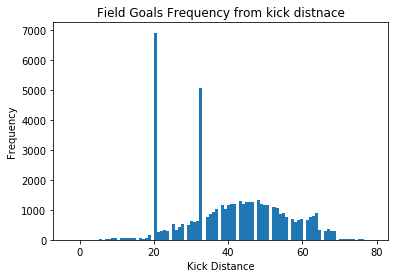

In [14]:
#Fields goals made Frequency over Kick distance
field_goals_kick_distance = NFL[NFL['field_goal_result']=='made']
field_goals_kick_distance.head()
NFL['kick_distance'].plot(kind='hist', bins=100)
plt.title('Field Goals Frequency from kick distnace')
plt.xlabel('Kick Distance')

Here is some more field goal output, this shows percentages of kicks blocked and made by team

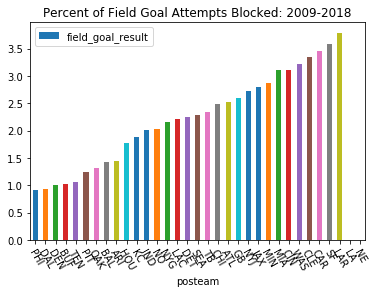

In [15]:
blocked_fieldgoals = NFL[NFL.field_goal_result == 'blocked'].groupby('posteam').count()[['field_goal_result']]
TotalKicked_byTeam = NFL[NFL.field_goal_result != 'Na'].groupby('posteam').count()[['field_goal_result']]
PercentFieldGoalsBlocked=blocked_fieldgoals/TotalKicked_byTeam*100
PercentFieldGoalsBlocked.sort_values(by='field_goal_result',
                                     ascending = True).plot(kind='bar',rot = -60,
                                    y='field_goal_result',title='Percent of Field Goal Attempts Blocked: 2009-2018')

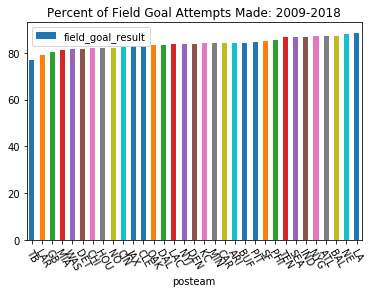

In [16]:
made_fieldgoals = NFL[NFL.field_goal_result == 'made'].groupby('posteam').count()[['field_goal_result']]
TotalKicked_byTeam = NFL[NFL.field_goal_result != 'Na'].groupby('posteam').count()[['field_goal_result']]
PercentFieldGoalsMade=made_fieldgoals/TotalKicked_byTeam*100
PercentFieldGoalsMade.sort_values(by='field_goal_result',
                                     ascending = True).plot(kind='bar',rot = -60,
                                    y='field_goal_result',title='Percent of Field Goal Attempts Made: 2009-2018')

##### New England's Success
What is interesting is that even though Special Teams may not be thought of as the most important part of a football team compared to its offense and defense, we see a very successful team like the Patriots have great success in the Field Goal kicking area.  The first plot shows the percentage of field goals blocked over the last 10 years, and New England has not had 1 field goal blocked in that time period! The second plot shows us that New England has the second highest percentage in terms of field goals made during that time period as well.

#### Punt
Despite it being called special teams, many viewers don't care much of the punt plays because it simply a transfer of possession. The punter kicks the ball and the returner then decides to either run it or fair catch the ball. It is a play with rare excitement. However, it serves a very important element of the gameplay strategy. An effective punt can put the opposing team deep in their own red zone (between the 20 yard line and the goal line of the opposing side). Not only does this add more field for them to travel, it also creates pressure for the offense. If they are pinned far back enough, the pressure for perfection increases since a change of possession at that part of the field would most likely result in points for the opposition. Aside from risking turnovers, there is also the risk of a safety, which is when the ball carrier is tackled in his own endzone. This gives the defense 2 points and possession of the ball as well. In this view, we can see Kansas City and Arizona have by far the most punts in the Red Zone.

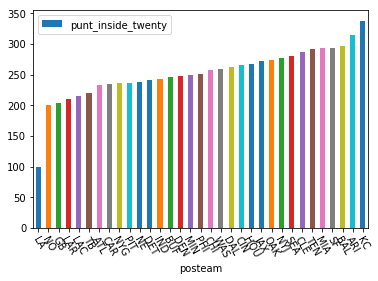

In [17]:
Teampunts_inside_20 = NFL[NFL.punt_inside_twenty == 1].groupby('posteam').count()[['punt_inside_twenty']]
Teampunts_inside_20.sort_values(by='punt_inside_twenty',ascending=True).plot(kind='bar',rot=-60,
                    y='punt_inside_twenty')

With such an importance in the punt game, punters are expected to have excellent accuracy. Not only is placing a punt in the Red Zone an important feat, it is not worth anything if the opposing team has an outstanding specialist returner such as Devin Hester who can electricfy a special teams play the same way super star offensive players electrify the offense during big breaks. In order to avoid players such as Devin Hester and ensure the opposing team does not have an opportunity to return the ball, the punter must kick the ball out of bounds in order to force the opposing team to start from there. As we see here, once again Kansas City at the top with far more downed punts than any other team. Considering Kansas City has held Dustin Colquitt at the punter position since he was drafted in 2005, they have enjoyed consistency and precision at the position, which has certain given them an edge in the game.

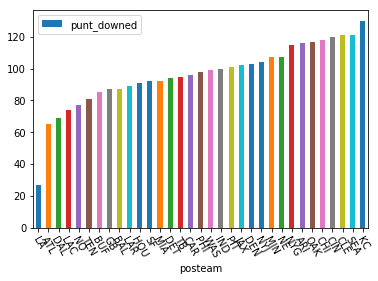

In [18]:
PuntsDowned = NFL[NFL.punt_downed==1].groupby('posteam').count()[['punt_downed']]
PuntsDowned.sort_values(by='punt_downed',ascending = True).plot(kind='bar',rot=-60,
                   y='punt_downed')

#### The Rise of the Quarterback-to-Tight End Connection
Over the past decade, the role of the tight end position has changed into a more versatile role. Tight ends are now expected to be able to be quicker and more agile than a lineback but also strong enough to block a bull rushing defensive end. We have seen many of these great tight ends embrace the new demands of their role and excel at it. 

In [19]:
RomoToWitten = NFL[(NFL["posteam"] == 'DAL')  & (NFL["desc"].str.contains("J.Witten"))
                 & (NFL["desc"].str.contains("T.Romo")) & (NFL['pass_attempt'] == 1)]
BradyToGronk = NFL[(NFL["posteam"] == 'NE')  & (NFL["desc"].str.contains("R.Gronkowski"))
                 & (NFL["desc"].str.contains("T.Brady")) & (NFL['pass_attempt'] == 1)]
RiversToGates = NFL[(NFL["posteam"] == 'LAC')  & (NFL["desc"].str.contains("A.Gates"))
                 & (NFL["desc"].str.contains("P.Rivers")) & (NFL['pass_attempt'] == 1)]
ManningToClark = NFL[(NFL["posteam"] == 'IND')  & (NFL["desc"].str.contains("D.Clark"))
                 & (NFL["desc"].str.contains("P.Manning")) & (NFL['pass_attempt'] == 1)]
TKelce = NFL[(NFL["posteam"] == 'KC')  & (NFL["desc"].str.contains("T.Kelce"))
                 & (NFL['pass_attempt'] == 1)]
GregOlsen = NFL[(NFL["desc"].str.contains("G.Olsen")) & (NFL['pass_attempt'] == 1)]

DaltonToEifert = NFL[(NFL["posteam"] == 'CIN')  & (NFL["desc"].str.contains("T.Eifert"))
                 & (NFL["desc"].str.contains("A.Dalton")) & (NFL['pass_attempt'] == 1)]
RyanGonzalez = NFL[(NFL["posteam"] == 'ATL')  & (NFL["desc"].str.contains("T.Gonzalez"))
                 & (NFL["desc"].str.contains("M.Ryan")) & (NFL['pass_attempt'] == 1)]
BigBenToMiller = NFL[(NFL["posteam"] == 'PIT')  & (NFL["desc"].str.contains("H.Miller"))
                 & (NFL["desc"].str.contains("B.Roethlisberger")) & (NFL['pass_attempt'] == 1)]



In [20]:
Mean_Romo_to_Witten = statistics.mean(RomoToWitten['yards_gained'].dropna()) #average yards gained for a play with a pass attempt to Witten
Mean_TB_to_Gronk = statistics.mean(BradyToGronk['yards_gained'].dropna()) #average yards gained for a play with a pass attempt to Gronk
Mean_Rivers_to_Gates = statistics.mean(RiversToGates['yards_gained'].dropna())
Mean_ManningToClark = statistics.mean(ManningToClark['yards_gained'].dropna())
Mean_TKelce = statistics.mean(TKelce['yards_gained'].dropna())
Mean_GregOlsen = statistics.mean(GregOlsen['yards_gained'].dropna())
Mean_DaltonToEifert = statistics.mean(DaltonToEifert['yards_gained'].dropna())
Mean_RyanGonzalez = statistics.mean(RyanGonzalez['yards_gained'].dropna())
Mean_BigBen = statistics.mean(BigBenToMiller['yards_gained'].dropna())






In [21]:
mean_yards = [Mean_Romo_to_Witten, Mean_TB_to_Gronk, Mean_Rivers_to_Gates,Mean_ManningToClark,Mean_TKelce,
             Mean_GregOlsen,Mean_DaltonToEifert,Mean_RyanGonzalez,Mean_BigBen]
y_lab = ['Romo/Witten', 'Brady/Gronk', 'Rivers/Gates','Manning/Clark','Travis Kelce', 'Greg Olsen','Dalton/Eifert',
        'Ryan/Gonzalez','BigBen/H.Miller']


In [22]:
y_pos = np.arange(len(y_lab))

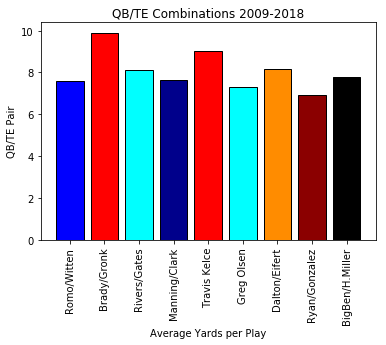

In [23]:
plt.bar(y_pos,mean_yards, color=('blue','red','cyan','darkblue','red','cyan','darkorange','darkred','black'),edgecolor='black')
plt.xticks(y_pos, y_lab, rotation=90)
plt.title('QB/TE Combinations 2009-2018')
plt.xlabel('Average Yards per Play')
plt.ylabel('QB/TE Pair')

plt.show() #Barplot of mean yards per play from QB to TE
            

Here we have done some analysis on the best Quarterback and Tight End combinations over the last decade, we included several of the big names, and felt it would be wrong to do tight end analysis without including Travis Kelce, despite having an inconsistent name as his quarterback.  We also wanted to include Greg Olsen and Tony Gonzalez with Atlanta for the same reason as Kelce.  As you can see, Tom Brady and Rob Gronkowski have been the most dominant duo over the last 10 years in terms of yards gained per play, this visual includes incompletions in the total average.

We were mainly driven by questions around the Patriots success and with Gronkowski announcing his retirement, we wanted to take a look at his supposed dominance.  Obviously there is no clear statistical proof here, but it is worth noting how much higher Brady and Gronk's yards per play was than every other dominant combination, and evern Travis Kelce on his own.

#### Explosive Offensive Plays
While the average play doesn't amount to many yards gained, there are explosive plays in which the player breaks a run/catch for a large number of yards. The top 20 plays with the most yards gained that resulted in touchdowns shows familiar players who have become known for their break away ability.

In [24]:
Big_Plays = NFL.sort_values(by='yards_gained',ascending=False)[:20]
Big_Plays['scorer'] = Big_Plays["rusher_player_name"]
Big_Plays['scorer'].fillna(Big_Plays['receiver_player_name'], inplace = True)

In [25]:
Big_Touchdowns = Big_Plays[['play_type',
          'down',
          'yards_gained',
          'game_date',
          'qtr',
          'desc',
          'scorer',
          'rusher_player_name',
          'receiver_player_name']]
Big_Touchdowns.head()

,play_type,down,yards_gained,game_date,qtr,desc,scorer,rusher_player_name,receiver_player_name
443775,run,1.0,99.0,2018-12-06,2,"(7:25) D.Henry up the middle for 99 yards, TOU...",D.Henry,D.Henry,NaN
91957,pass,1.0,99.0,2011-09-12,4,(5:57) (Shotgun) T.Brady pass deep left to W.W...,W.Welker,NaN,W.Welker
130603,pass,3.0,99.0,2011-12-24,2,(2:27) (Shotgun) E.Manning pass short right to...,V.Cruz,NaN,V.Cruz
317514,pass,1.0,98.0,2016-09-11,3,(8:03) T.Lelito reported in as eligible. D.Br...,B.Cooks,NaN,B.Cooks
26235,pass,1.0,98.0,2009-11-22,3,(11:40) R.Fitzpatrick pass deep right to T.Owe...,T.Owens,NaN,T.Owens


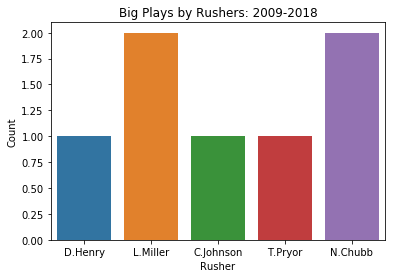

In [26]:
Big_Touchdowns.describe()
rush = Big_Touchdowns[(Big_Touchdowns["play_type"] == 'run')]
rushes = sns.countplot(x="rusher_player_name",data=rush)
plt.title('Big Plays by Rushers: 2009-2018')
plt.xlabel('Rusher')
plt.ylabel('Count')

plt.show()

            

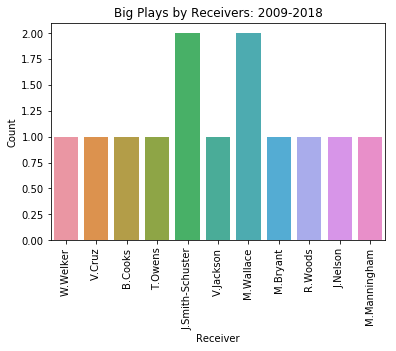

In [27]:
catches = Big_Touchdowns[(Big_Touchdowns["play_type"] == 'pass')]
pas = sns.countplot(x="receiver_player_name",data=catches)
plt.setp(pas.get_xticklabels(), rotation=90)

plt.title('Big Plays by Receivers: 2009-2018')
plt.xlabel('Receiver')
plt.ylabel('Count')

plt.show() 
            

Here we decided to do some analysis of the biggest plays that resulted in a touchdown and seperate them by running play and passing play, you can see that Nick Chubb and Lamar Miller had 2 of the 20 biggest plays each as running backs, and Juju Smith-Schuster and Mike Wallace also had 2 of the plays by receivers.

#### Players with most passes, receives for Touchdowns , Interceptions

In [28]:
df_tochdown = NFL[ (NFL["sp"] == 1) & (NFL["touchdown"] == 1) ]
df_intercept = NFL[ (NFL["sp"] == 0) &  pd.notna(NFL["interception"])]
# get count of touchdown,interceptions by player 
td_by_player  = (df_tochdown.groupby(['receiver_player_name']).size().reset_index(name='count')).sort_values(by=['count'], ascending=False) 
td_by_player = td_by_player[:20]
td_by_pass_player  = (df_tochdown.groupby(['passer_player_name']).size().reset_index(name='count')).sort_values(by=['count'], ascending=False) 
td_by_pass_player = td_by_pass_player [:20]
inter_by_player = (df_intercept.groupby(['interception_player_name']).size().reset_index(name='count')).sort_values(by=['count'], ascending=False) 
inter_by_player = inter_by_player [:20]


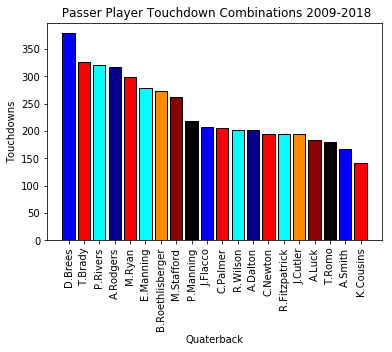

We can see Drew Brees (QB of New Orleans Saints) has had more touchdowns since 2009 with over 350! He is followed by Tom Brady and Phillip Rivers, all of which are deemed to be elite QBs in the league.


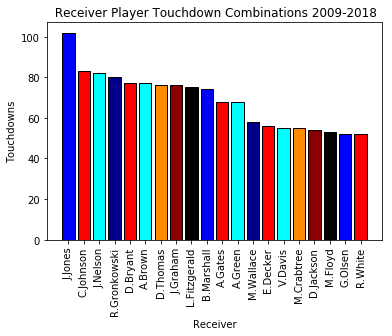

Despite having the #1 touchdown thrower, it appears New Orleans doesn’t have a receiver in the top 5 players with the most touchdowns! Jimmy Graham, the former tight end for New Orleans Saints, would be the first player to have ever received a touchdown pass from Drew Brees.


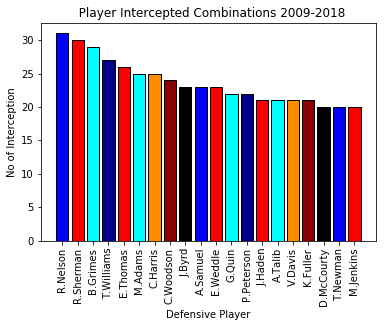

In [29]:
plt.bar(td_by_pass_player['passer_player_name'], td_by_pass_player['count'], color=('blue','red','cyan','darkblue','red','cyan','darkorange','darkred','black'),edgecolor='black')
plt.xticks(td_by_pass_player['passer_player_name'], td_by_pass_player['passer_player_name'], rotation=90)
plt.title(' Passer Player Touchdown Combinations 2009-2018')
plt.xlabel('Quaterback')
plt.ylabel('Touchdowns')
plt.show() 

print("We can see Drew Brees (QB of New Orleans Saints) has had more touchdowns since 2009 with over 350! He is followed by Tom Brady and Phillip Rivers, all of which are deemed to be elite QBs in the league.")

plt.bar(td_by_player['receiver_player_name'], td_by_player['count'], color=('blue','red','cyan','darkblue','red','cyan','darkorange','darkred','black'),edgecolor='black')
plt.xticks(td_by_player['receiver_player_name'], td_by_player['receiver_player_name'], rotation=90)
plt.title(' Receiver Player Touchdown Combinations 2009-2018')
plt.xlabel('Receiver')
plt.ylabel('Touchdowns')
plt.show() 

print("Despite having the #1 touchdown thrower, it appears New Orleans doesn’t have a receiver in the top 5 players with the most touchdowns! Jimmy Graham, the former tight end for New Orleans Saints, would be the first player to have ever received a touchdown pass from Drew Brees.")

plt.bar(inter_by_player['interception_player_name'], inter_by_player['count'], color=('blue','red','cyan','darkblue','red','cyan','darkorange','darkred','black'),edgecolor='black')
plt.xticks(inter_by_player['interception_player_name'], inter_by_player['interception_player_name'], rotation=90)
plt.title('  Player Intercepted Combinations 2009-2018')
plt.xlabel('Defensive Player')
plt.ylabel('No of Interception')
plt.show() 

### Exploring the Shield
#### Exploring joint attributes and classes
Looking into the data set's variables, we can clearly see there is a high number of variables that are correlated with each other. This is done by design of the data set. The following correlation matrix illustrates the variables and the correlation with each other.

In [30]:
NFLcorr = NFL.corr()
NFLcorr.style.background_gradient(cmap='coolwarm')


C:\Users\javie\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


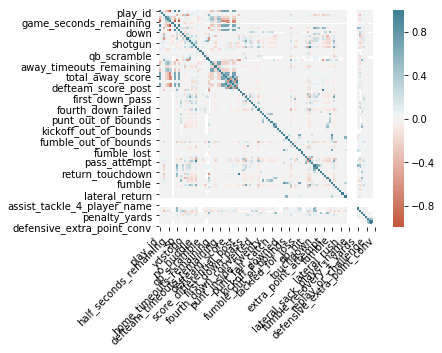

In [31]:
ax = sns.heatmap(
    NFLcorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


We see there are some variables which are correlated with each other. This is to be expected considering these variables are related. Just to look to a few examples:
###### Drive v. Quarters
The 'drive' variable is the attempted offensive drive from the team with possession while the 'quarter' variable provides the quarter number in which the play occurred. As a result, as the drive number increases, so would the quarter number. As we can see in the scatterplot, the correlation between both is considerably clear and evident. Although they are correlated, there is no causality between both variables. Drives may continue to go as high as possible regardless of the quarter and the quarter may continue to go on regardless of the offensive drive.

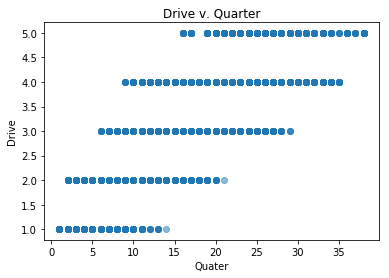

In [39]:
#Drive v. Quarter
plt.scatter(NFL['drive'], NFL['qtr'], alpha=0.5)
plt.title("Drive v. Quarter")
plt.ylabel("Drive")
plt.xlabel("Quater")
plt.show()

##### Net Yards v. Goal-to-Go & Scoring Play
The 'ydsnet' variable is the running total yards of the drive whereas 'goal_to_go' identifies when the drive must be converted into a touchdown or face turnover on downs. Considering the ball has to be driven down to the goal line, it is to be expected that the net yards of a drive will at least be positive. When looking at plays where they are in the final set of downs then we can see the net yards is mostly positive. Although there is a correlation between the two, there is no causal relationship.

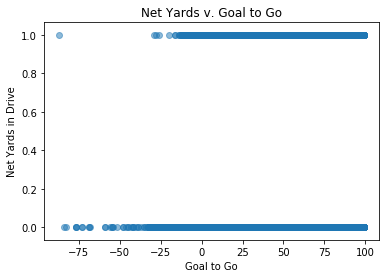

In [38]:
#Yards Net v. Goal to Go
plt.scatter(NFL['ydsnet'], NFL['goal_to_go'], alpha=0.5)
plt.xlabel("Goal to Go")
plt.ylabel("Net Yards in Drive")
plt.title("Net Yards v. Goal to Go")
plt.show()

Just like the scatter plot above, we see the near identical relationship between the net yards of a play and whether the play is a scoring play.

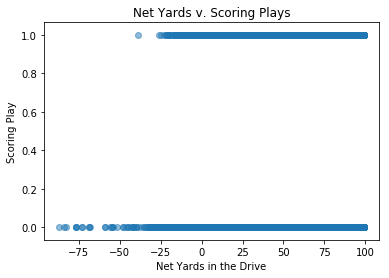

In [35]:
#Yards Net v. Scoring Play
plt.scatter(NFL['ydsnet'], NFL['sp'], alpha=0.5)
plt.xlabel("Net Yards in the Drive")
plt.ylabel("Scoring Play")
plt.title("Net Yards v. Scoring Plays")
plt.show()

##### Shotgun v. QB Dropback
The 'shotgun' variable identifies if the play was run out of the shotgun formation. This formation occurs when the quaterback does not line up under the center but is instead a few yards behind the center. The qb_dropback variable identifies plays in which the quaterback drops back further in order to create room in the pocket. Considering both of these may occurr with or without the other, there are only 4 outcomes. These outcomes are illustrated in the plot below. Like the others, the correlation does not cause causation since both are predetermined actions prior to the start of the play.

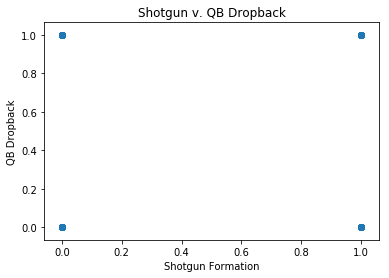

In [36]:
#Shotgun formation v. QB dropback
plt.scatter(NFL['shotgun'], NFL['qb_dropback'], alpha=0.5)
plt.xlabel("Shotgun Formation")
plt.ylabel("QB Dropback")
plt.title("Shotgun v. QB Dropback")
plt.show()

##### Yards After Catch v. Yards Gained
The variable 'yards after catch' refer to the yards covered by the receiver when a pass is caught. The variable 'yards gained' refer to the yards gained from the line of scrimmage. In the event of a pass caught past the line of scrimmage, the variable 'yards gained' would equal to 'yards after catch' + 'length of pass." This is the very reason why we see what almost looks like a linear threshhold in the scatter plot. Since the outcome of the yards after catch has a direct effect on the yards gained, we can verify these variables have a high correlation.

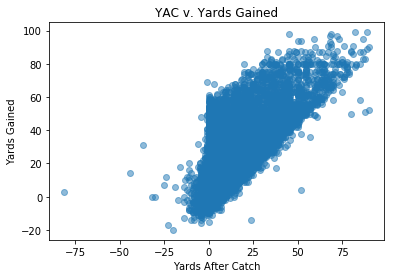

In [37]:
#Yards After Catch v. Yards Gained
plt.scatter(NFL['yards_after_catch'], NFL['yards_gained'], alpha=0.5)
plt.xlabel("Yards After Catch")
plt.ylabel("Yards Gained")
plt.title("YAC v. Yards Gained")
plt.show()

## Adding to the Shield
### Additional Features
While the data set is most certainly extensive, there is certainly more features that could be added to each row in order to further enhance the depth of the analysis. Additional information regarding which players were on the field would help to provide great insight into the play style. While the player may not have made a tackle, a strong disruptive presence from the player would most certainly have an impact in the game.
<br><br>
The players in the trenches are probably some of the most underappreciated in the game. Without an offensive line, the offense is not able to build a run foundation or even give the quarterback enough time to read a defense out of a shotgun formation. When a player in the line is injured, the defense takes note and is likely to blitz that gap in order to exploit the loss. This disruption means a team who relies heavily on the running game may want to avoid running the ball in which that backup player is a critical component. Of course this makes the offense predictable and only gives the defense a greter advantage.
<br><br>
The same could be said for defensive players. In situations where defensive players are mismatched is when you will see offenses take advantage. The New England Patriots are famous for lining up their Tight Ends in bunch formations in order to force defenses to adjust. This requires the defense to either make linebackers drop back into coverage and try to cover a player who is likely more athletic than they are or you risk bringing down defensive backs to assist. While they would certainly level the playing field in the passing game, this just created a mismatch in the running game. As a result, knowing which players are out in the field and which positions would also help provide greater insight into the effects of individuals in the game.
<br><br>
Additional features would be crowd size, crowd noise, officials names, temp., weather, etc. These are elements that are usually out of the players' control but many argue have an effect in the performance of the game. While prepation is much more fast paced during the regular season, many teams have practice facilities in other states in order to be able to get accustomed to the environment there. It is common for teams to travel to Colorado for a week before they are scheduled to play in Mexico City. The elevation in Colorado is close to that of Mexico City, which helps prepare the players to get used to the thin air they'll be playing in. These would also help provide insight into the legendary home field advantage.

## Exceptional Shield
### Exceptional Work
During the analysis of the data and review of the correlation of many of the attributes, we were preparing to conduct standard regression analysis. However, it appears the data may be better suited if it were treated as a time series data set since it is clear that the plays and their outcomes affect the upcoming play. If a team is trailing by multiple scores in the 4th quarter, it is to be expected for them to abandon the run and focus more on the passing game in order to cover more ground. These are relationships we simply won't be able to capture if we ignore the fact that the time variable in the data verifies the plays are actually linked. While the plays from Week 1 may not have a direct impact in the plays of Week 15 (unless injuries occured), the plays from the beginning of the play certainly have an impact on the plays in the end of the play. Should the time series application be a goof fit for our project moving forward, it is certainly something the group will explore in order to better enhance our analysis.